<b>Lecture Script</b>

Linear filtering :

Shift pixels by one

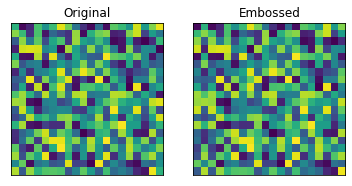

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = np.random.randint(0,255, size=[20,20], dtype='uint8')

#kernel = np.ones((5,5),np.float32)/25
kernel = np.array([[0,0,0], [1, 0, 0], [0, 0, 0]])
dst = cv2.filter2D(img,-1,kernel)

plt.imshow(img),plt.title('Original')
plt.show()

plt.imshow(dst),plt.title('Shift by one')
plt.show()


Mean filter

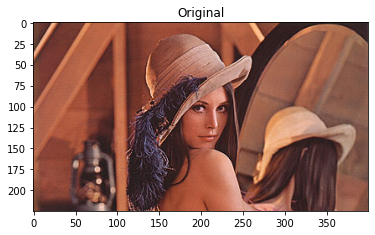

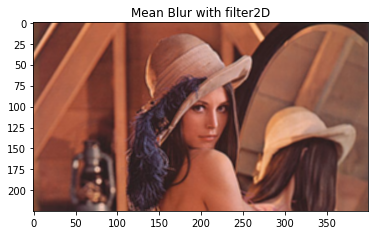

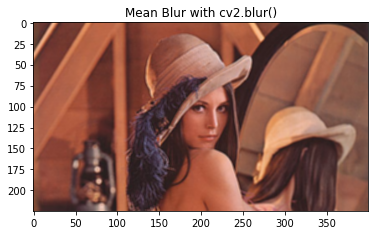

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#kernel = np.ones((5,5),np.float32)/25
kernel = np.array([[1 , 1, 1], [1, 1, 1], [1, 1, 1]]) / 9

dst = cv2.filter2D(img,-1,kernel)

plt.imshow(img),plt.title('Original')
plt.show()


plt.imshow(dst),plt.title('Mean Blur with filter2D')
plt.show()

blur = cv2.blur(img,(3,3))

plt.imshow(blur),plt.title('Mean Blur with cv2.blur()')
plt.show()

Gaussian filter

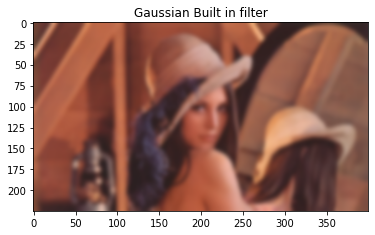

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

KernelSize = (15, 15)
GaussianBlurImg = cv2.GaussianBlur(src=img, ksize=KernelSize, sigmaX=0, sigmaY=0)

plt.imshow(GaussianBlurImg), plt.title('Gaussian Built in filter')
plt.show()

High-pass filter - Sharpening

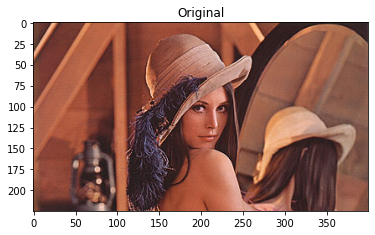

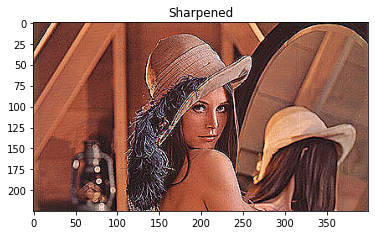

In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel = np.array([[0,-1,0], [-1, 5, -1], [0, -1, 0]])
dst = cv2.filter2D(img,-1,kernel)

plt.imshow(img),plt.title('Original')
plt.show()

plt.imshow(dst),plt.title('Sharpened')
plt.show()






Non-linear Filters:

Median filter - effective for salt and pepper

The principle of the median filter is to replace the gray level of each pixel by the median of the gray levels in a neighborhood of the pixels, instead of using the average operation.

Linear filtering is the filtering method in which the value of output pixel is linear combinations of the neighbouring input pixels. it can be done with convolution.For examples, mean/average filters or Gaussian filtering.
A non-linear filtering is one that cannot be done with convolution or Fourier multiplication. A sliding median filter is a simple example of a non-linear filter.

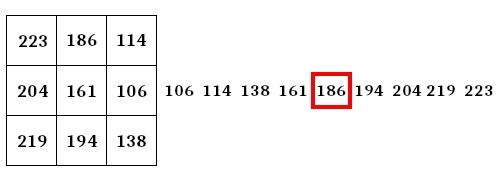

In [21]:
from IPython.display import Image
Image("median-calcul.png")

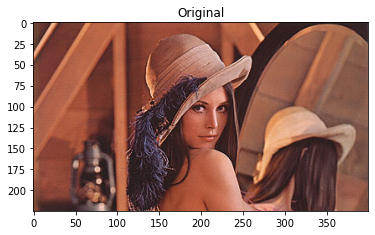

<Figure size 1440x1440 with 0 Axes>

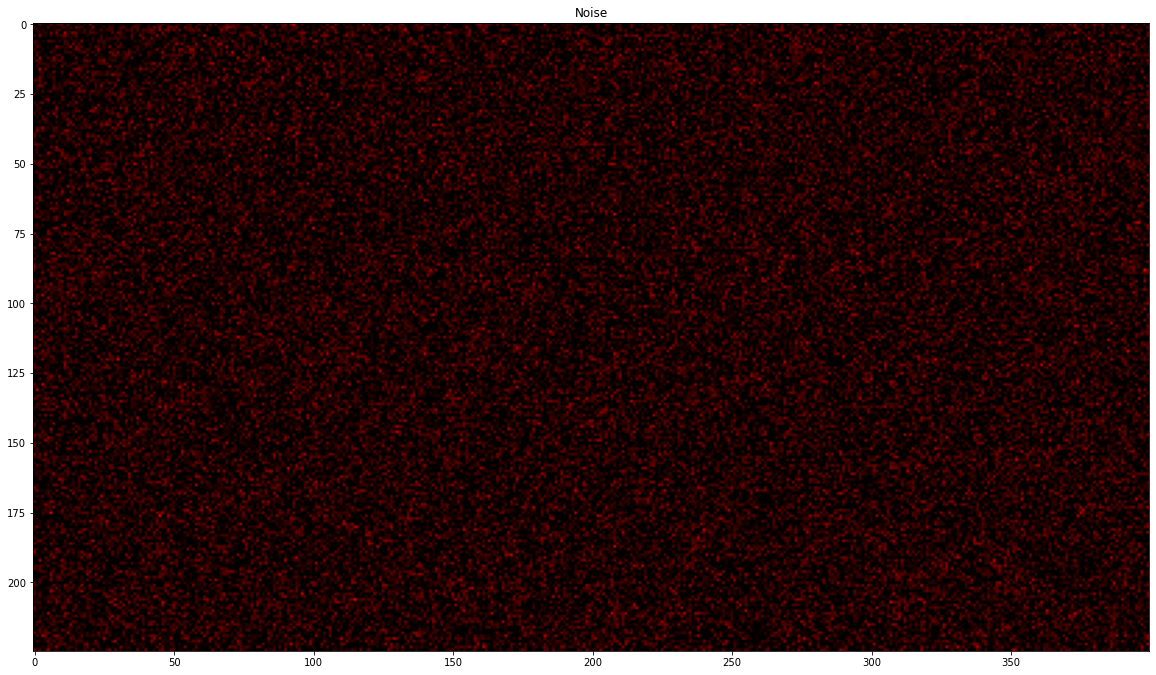

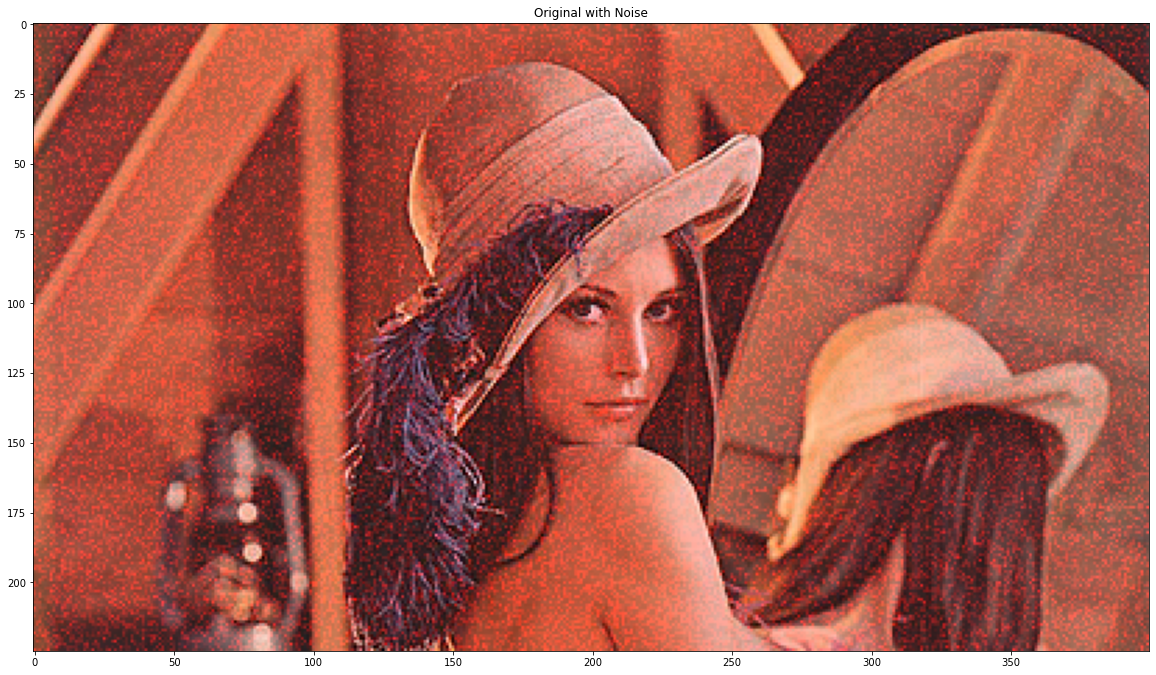

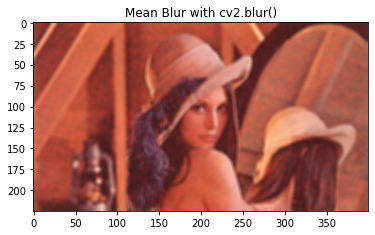

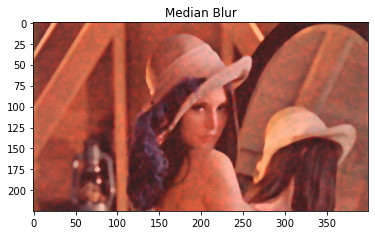

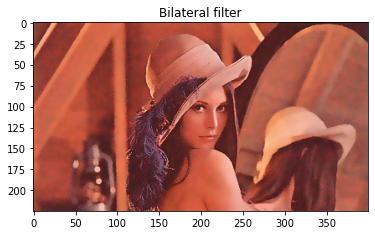

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img),plt.title('Original')
plt.show()
plt.figure(figsize=(20,20))
#Add noise
im = np.zeros(img.shape, np.uint8) # do not use original image it overwrites the image
mean = 20
sigma = 50
cv2.randn(im,mean,sigma)
plt.figure(figsize=(20,20))
plt.imshow(im, cmap='gray')
plt.title('Noise')
plt.show()

plt.figure(figsize=(20,20))
# create the random distribution
im_noise = cv2.add(img, im) # add the noise to the original image
plt.imshow(im_noise, cmap='gray')
plt.title('Original with Noise')
plt.show()


blur = cv2.blur(im_noise,(5,5))

plt.imshow(blur),plt.title('Mean Blur with cv2.blur()')
plt.show()

medblur = cv2.medianBlur(im_noise,5)

plt.imshow(medblur),plt.title('Median Blur')
plt.show()


bilblur = cv2.bilateralFilter(im_noise,9,75,75)

plt.imshow(bilblur),plt.title('Bilateral filter')
plt.show()


Salt and Pepper

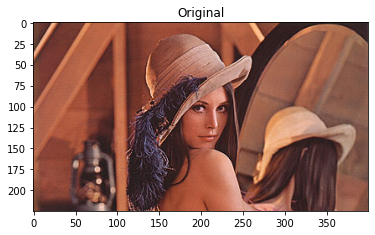

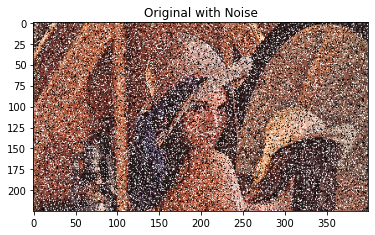

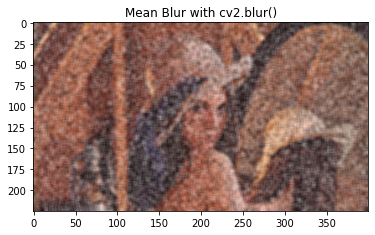

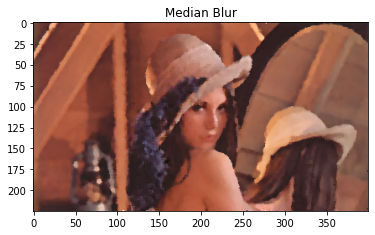

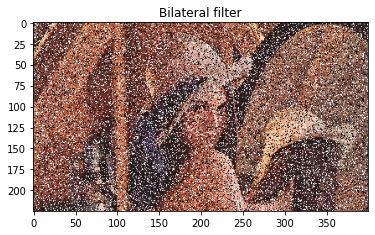

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt



def addsalt_pepper(img, SNR):
    img_ = img.copy()
    c, h, w = img_.shape
    mask = np.random.choice((0, 1, 2), size=(1, h, w), p=[SNR, (1 - SNR) / 2., (1 - SNR) / 2.])
    mask = np.repeat(mask, c, axis=0)
    img_[mask == 1] = 255 # salt noise
    img_[mask == 2] = 0 #
    return img_



img = cv2.imread('images/lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img),plt.title('Original')
plt.show()

#Add noise
im_noise = addsalt_pepper(img.transpose(2, 1, 0), 0.8)
im_noise = im_noise.transpose(2, 1, 0)
 # add the noise to the original image
plt.imshow(im_noise, cmap='gray')
plt.title('Original with Noise')
plt.show()


blur = cv2.blur(im_noise,(5,5))

plt.imshow(blur),plt.title('Mean Blur with cv2.blur()')
plt.show()

medblur = cv2.medianBlur(im_noise,5)

plt.imshow(medblur),plt.title('Median Blur')
plt.show()


bilblur = cv2.bilateralFilter(im_noise,9,75,75)

plt.imshow(bilblur),plt.title('Bilateral filter')
plt.show()


